<a href="https://colab.research.google.com/github/samuelpolontalo/Sentiment_analysis_NLTK/blob/main/sentiment_analysis_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import nltk

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samuelpolontalo","key":"4c225cd497bfa60de1c98cda8346dd7a"}'}

In [ ]:
# Install kaggle library 
!pip install -q kaggle
# Make ".kaggle" directory in root directory
!mkdir -p ~/.kaggle
# Copy the API token to the kaggle directory
!cp kaggle.json ~/.kaggle/
# Check the directory
!ls ~/.kaggle
# Adjust access permissions
!chmod 600 /root/.kaggle/kaggle.json

# WTF reinstall kaggle
!pip uninstall -y kaggle
!pip install kaggle

kaggle.json
Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 5.7 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=725c952eae18593959bcfa08f35b7d64d33835d00c64a406d2527edea6aa0594
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle


In [ ]:
import os

# authentication 
# os.environ["KAGGLE_USERNAME"] = 'reizkianyesaya'
# os.environ["KAGGLE_KEY"] = '92844990e0f3c2306230314f99e0e015'
os.environ["KAGGLE_USERNAME"] = 'samuelpolontalo'
os.environ["KAGGLE_KEY"] = '4c225cd497bfa60de1c98cda8346dd7a'

In [ ]:
!mkdir downloaded-data

In [ ]:
!kaggle datasets download -d snap/amazon-fine-food-reviews

 96% 233M/242M [00:10<00:00, 26.0MB/s]
100% 242M/242M [00:10<00:00, 23.1MB/s]


In [ ]:
# check the folders inside your directory
!ls
# check what is inside data folder
!ls downloaded-data

amazon-fine-food-reviews.zip  downloaded-data  kaggle.json  sample_data


In [ ]:
!mkdir {"extracted-data"}

In [ ]:
path_to_zip_file = '/content/amazon-fine-food-reviews.zip'

In [ ]:
directory_to_extract_to = '/content/extracted-data'

In [ ]:
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
df = pd.read_csv('/content/extracted-data/Reviews.csv')

https://www.youtube.com/watch?v=QpzMWQvxXWk&t=59s&ab_channel=MedallionDataScience

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [ ]:
df.shape

(568454, 10)

Quick EDA

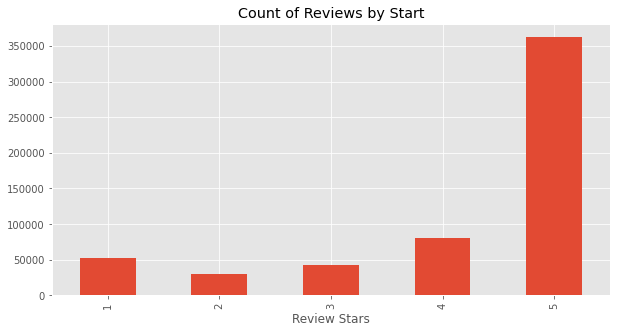

In [ ]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Start',
                                            figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

Basic NLTK

In [ ]:
example = df['Text'][50]

In [ ]:
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


vader! check youtube link

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am so sad')

{'compound': -0.5256, 'neg': 0.629, 'neu': 0.371, 'pos': 0.0}

In [ ]:
sia.polarity_scores('life so great')

{'compound': 0.659, 'neg': 0.0, 'neu': 0.313, 'pos': 0.687}

In [ ]:
sia.polarity_scores(example)

{'compound': -0.5448, 'neg': 0.22, 'neu': 0.78, 'pos': 0.0}

In [ ]:
res = {}
for i,row in tqdm(df.iterrows(), total=len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
import seaborn as sns

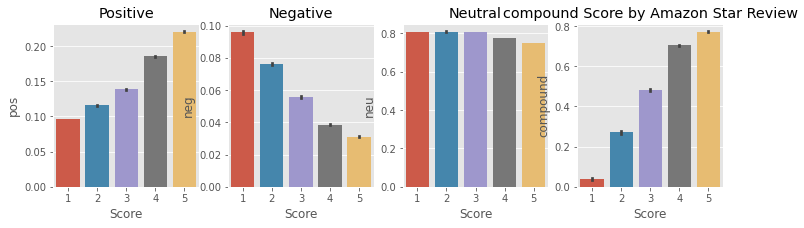

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(12,3))
ax = sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
ax = sns.barplot(data=vaders, x='Score', y='neg', ax=axs[1])
ax = sns.barplot(data=vaders, x='Score', y='neu', ax=axs[2])
ax = sns.barplot(data=vaders, x='Score', y='compound', ax=axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')
axs[3].set_title('Compoud')

ax.set_title('compound Score by Amazon Star Review')
plt.show()

Roberta Pretrained Model

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 35.5 MB/s 
     |████████████████████████████████| 596 kB 57.3 MB/s 
     |████████████████████████████████| 101 kB 13.5 MB/s 
     |████████████████████████████████| 6.6 MB 53.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import AutoTokenizer

In [ ]:
from transformers import AutoModelForSequenceClassification

In [ ]:
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [ ]:
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [ ]:
def polarity_scores_roberta(example):  
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2],
  }
  return scores_dict

In [ ]:
res = {}
for i,row in tqdm(df.iterrows(), total=len(df)):
  try:
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"] = value
    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result_rename, **roberta_result}
  except RuntimeError:
    print(f'Broke for id{myid}')


  0%|          | 0/568454 [00:00<?, ?it/s]

Broke for id83
Broke for id187
Broke for id529
Broke for id540
Broke for id746
Broke for id863
Broke for id1053
Broke for id1070
Broke for id1156
Broke for id1321
Broke for id1375
Broke for id1498
Broke for id1575
Broke for id1796
Broke for id1826
Broke for id2169
Broke for id2248
Broke for id2476
Broke for id2492
Broke for id2584
Broke for id2610
Broke for id2897
Broke for id2898
Broke for id2902
Broke for id2928
Broke for id2942
Broke for id2944
Broke for id2947
Broke for id2948
Broke for id3022
Broke for id3023
Broke for id3025
Broke for id3306
Broke for id3788
Broke for id3969
